In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import numpy as np
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
#nrg plot
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C6A1358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000041D61278>]], dtype=object)

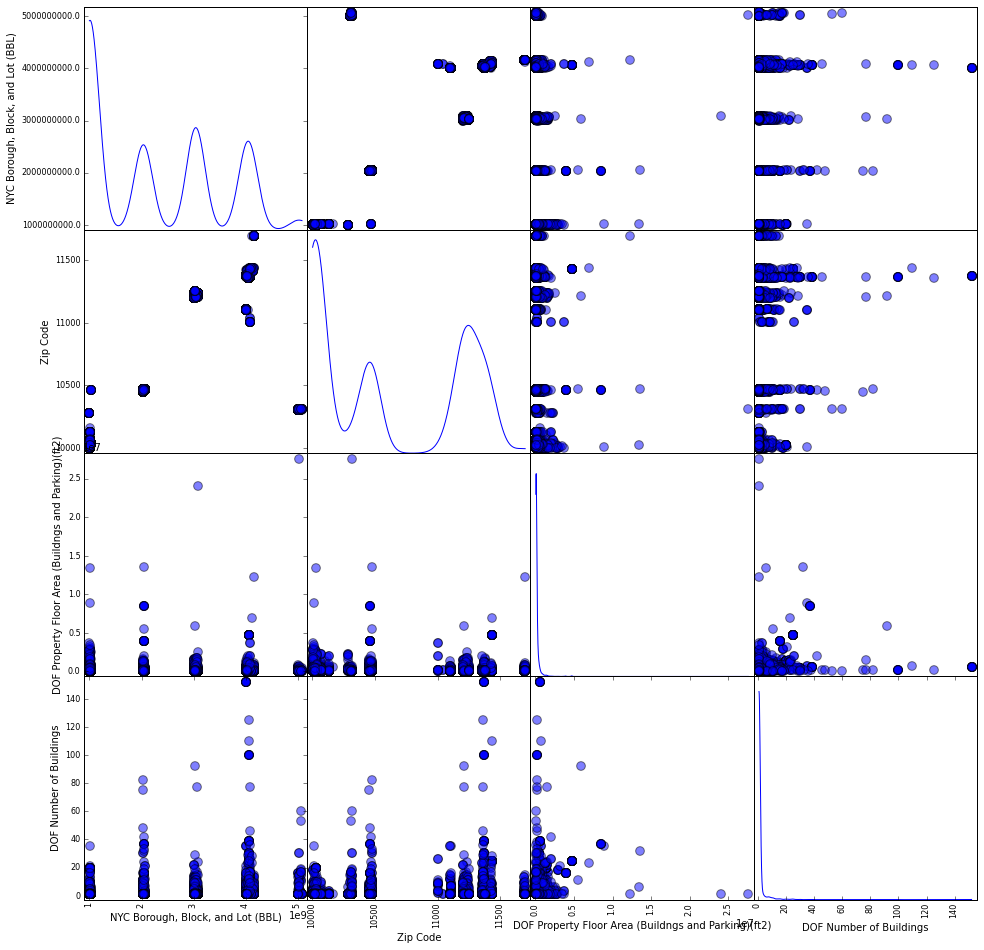

In [4]:
#in pandas scatter_matrix will plot each column agains each other. 
#that is a great way to begin inspecting your data 
#(though be careful cause it is computationally comsuming for large datasets)
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

Figure 1. Plot of each column against the other on the "Energy and Water Data Disclosure for Local Law 84" just to take a quick look on the data

In [5]:
#Below I created a function that returns True if what is passed as argument can be converted to a float,
#and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [6]:
#Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array)
#that I can use as an index to pick entries that I want to use from my arrays of interest. 
#I can replace the entries that failed to be converted to 'NaN'

indx1 = np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])
indx2 = np.vectorize(canconvert)(bsize['BBL'])
indx3 = np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)'])
nrg['Site EUI(kBtu/ft2)'][~indx1]=float('NaN')
bsize['BBL'][~indx2]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx3] = float('NaN')

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#Will confirm if my transformation work:
print nrg['Site EUI(kBtu/ft2)'][:10].astype(float)
print bsize['BBL'][:10].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'][:10].astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
Name: Site EUI(kBtu/ft2), dtype: float64
0    1002760020
1    1002280022
2    1005900056
3    1005890030
4    1005310056
5    1011860040
6    1004940026
7    1005580017
8    1001807505
9    1005820050
Name: BBL, dtype: float64
Record Number
16099     91968
500      235370
5017      64806
5116      62839
363       98000
6876      53275
10714     61846
1214     204417
1544      60110
1905     457946
Name: Reported Property Floor Area (Building(s)) (ft²), dtype: float64


###Merge of the datasets

In [8]:
nrg['BBL'] =nrg['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = pd.merge(nrg,bsize,how='inner',on=['BBL'],
                      sort=False,suffixes=('_x', '_y')  )
print bblnrgdata.columns

C:\Users\Marco\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Users\Marco\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [9]:
#TOTAL ENERGY
bblnrgdata['TotalEnergy']=bblnrgdata['Site EUI(kBtu/ft2)'].astype(float) * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

C:\Users\Marco\Anaconda\lib\site-packages\pandas\core\index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


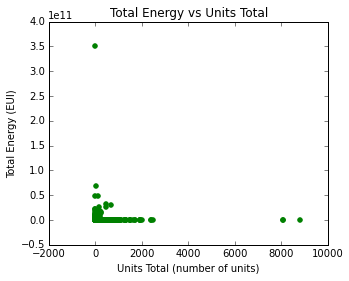

In [17]:
#Natural Scatter Plot
# Data
x_data = bblnrgdata['UnitsTotal']
y_data = bblnrgdata['TotalEnergy']
# Create a Figure object.
fig = plt.figure(figsize=(5, 4))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(x_data, y_data, color="green", marker="o")
# Add a title.
ax.set_title("Total Energy vs Units Total")
# Add some axis labels.
ax.set_xlabel("Units Total (number of units)")
ax.set_ylabel("Total Energy (EUI)")
# Produce an image.
fig.show()

Figure 2. Scatter plot of Total Energy vs Units Total. The plot is really diffuse because of the scales on the x/y axis and because of the precense of outliers.

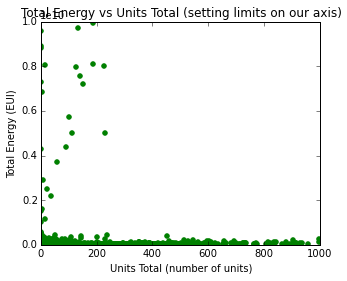

In [18]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1) 
ax.scatter(x_data, y_data, color="green", marker="o")
ax.set_title("Total Energy vs Units Total (setting limits on our axis)")
ax.set_xlim([1,1000])
ax.set_ylim([1000,1e10])
ax.set_xlabel("Units Total (number of units)")
ax.set_ylabel("Total Energy (EUI)")
fig.show()

Figure 3. A second version of Figure 2: Total Energy vs Units Total setting limits on our axis

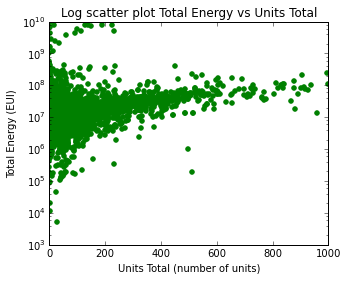

In [19]:
#Logaritmic figure
#I am choosing buildings with more than 1000 of Total Energy consumption and less than 1000 units

bblnrgdata_cut = bblnrgdata[bblnrgdata.TotalEnergy>1000][bblnrgdata.UnitsTotal<1000][bblnrgdata.UnitsTotal>0]
x_data = bblnrgdata_cut['UnitsTotal']
y_data = bblnrgdata_cut['TotalEnergy']
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data, color="green", marker="o")
ax.set_title("Log scatter plot Total Energy vs Units Total")
ax.set_xlim([1,1000])
ax.set_ylim([1000,1e10])
ax.set_yscale('log')
ax.set_xlabel("Units Total (number of units)")
ax.set_ylabel("Total Energy (EUI)")
fig.show()

Figure 4. Logaritmic scatter plot of Total Energy vs Units Total

##Regression

In [13]:
#dependant variable: Energy Total
X = sm.add_constant(np.log10(x_data))
model1 = sm.OLS(np.log10(y_data), X, missing='drop').fit() # ignores entires where x or y is NaN
print model1.summary()

#dependant variable: Units Total
X = sm.add_constant(np.log10(y_data))
model2 = sm.OLS(np.log10(x_data), X, missing='drop').fit() # ignores entires where x or y is NaN
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:            TotalEnergy   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     42.69
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           7.06e-11
Time:                        13:52:58   Log-Likelihood:                -3853.7
No. Observations:                4977   AIC:                             7711.
Df Residuals:                    4975   BIC:                             7724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9346      0.019    355.889      0.0

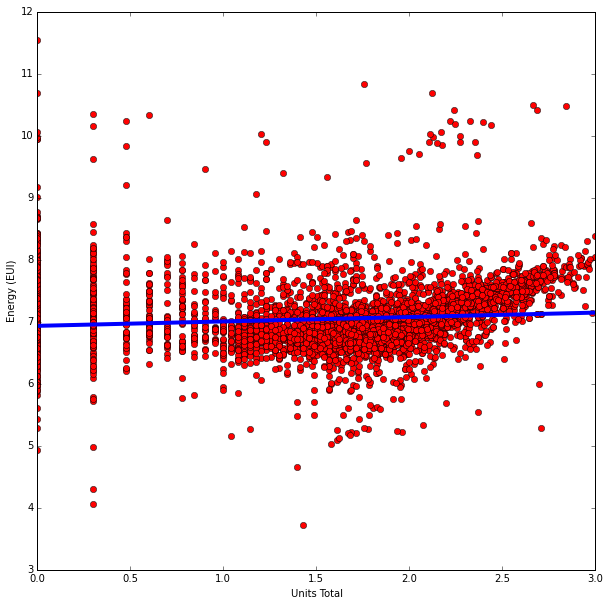

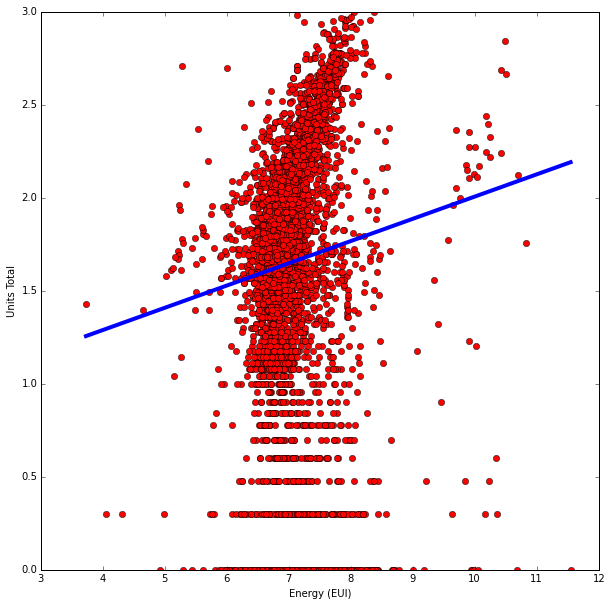

In [20]:
c1=model1.params[0]
c2=model1.params[1]
c3=model2.params[0]
c4=model2.params[1]

x_log=np.log10(x_data)
y_log=np.log10(y_data)
a = np.linspace(x_log.min(), x_log.max(),200)
pl.figure(figsize=(10,10))
plt.xlabel('Units Total')
plt.ylabel('Energy (EUI)')
plt.plot(x_log,y_log,'ro')
plt.plot(a,c1+c2*a,linewidth=4.0)
plt.show()

pl.figure(figsize=(10,10))
a = np.linspace(y_log.min(), y_log.max(),200)
plt.xlabel('Energy (EUI)')
plt.ylabel('Units Total')
plt.plot(y_log,x_log,'ro')
plt.plot(a,c3+c4*a,linewidth=4.0)
plt.show()

Figure 5. Up: Logaritmic scatter plot for Energy vs Units Total and a line that fits the results (obtained from the linear regression) Down: Logaritmic scatter plot for Units Total vs Energy and a line that fits the results (obtained from the linear regression) 

###Look at the fit summary: which is better? Could you do a likelihood ratio test here? Why or why not??
I found the plot of Total Energy vs. Total Units is better,  because  the independent variable (total energy) is spread evenly in the range, rather than just clustered in a spot.

We can't do a likelihood ratio test here because the degree freedom is zero.

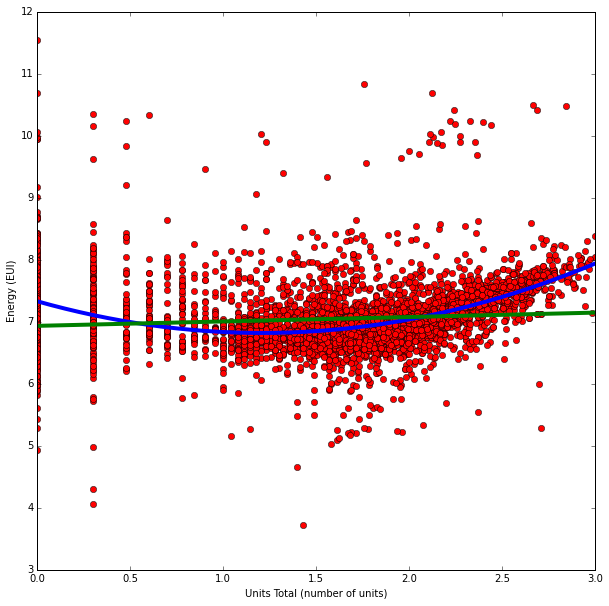

In [21]:
X=np.log10(x_data)
Y=np.log10(y_data)

p = np.polyfit(X,Y,2)
pol = np.poly1d(p)
x = np.linspace(X.min(), X.max(),200)
y = pol(x)

pl.figure(figsize=(10,10))
plt.xlabel('Units Total (number of units)')
plt.ylabel('Energy (EUI)')
plt.plot(X,Y,'ro')
plt.plot(x, y ,'b',linewidth=4.0)
plt.plot(x, c1+c2*x ,'g',linewidth=4.0)
plt.show()

Figure 6. Line and parabola fit on the logaritmic scatter plot of Energy Total vs Number of units. The parabola is a better fit for the data. 